In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from nn import Value
from nn import Neuron, Layer, MLP
import nn

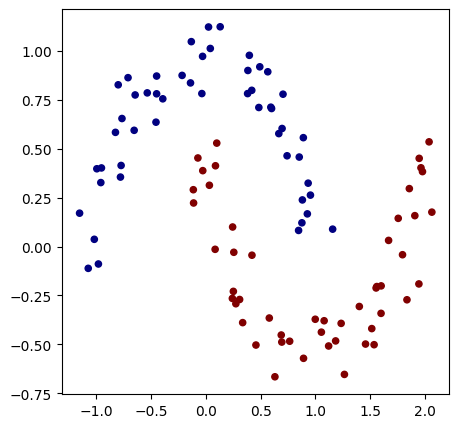

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1, random_state=40)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [3]:
learning_rate = 0.05
epochs = 1000

model = nn.Sequential(
    [
        nn.Layer(len(X[0]), 16, activation='relu'),
        nn.Layer(16, 16, activation='relu'),
        nn.DropoutLayer(proportion=0.20),
        nn.Layer(16, 4, activation='relu'),
        nn.DropoutLayer(proportion=0.1),
        nn.Layer(4, 1, activation='sigm')
    ]
)

print(f'Resumen del modelo: {model.layers}')

history_loss = nn.train_GD(nn.binary_cross_entropy_loss, model, X, y, epochs, learning_rate)

Resumen del modelo: [Layer(nin=2,nout=16,activation=relu), Layer(nin=16,nout=16,activation=relu), Dropout(proportion=0.2), Layer(nin=16,nout=4,activation=relu), Dropout(proportion=0.1), Layer(nin=4,nout=1,activation=sigm)]
Epoch 1/1000 | Loss: 1.11147
Epoch 2/1000 | Loss: 1.08691
Epoch 3/1000 | Loss: 1.06372
Epoch 4/1000 | Loss: 1.05694
Epoch 5/1000 | Loss: 1.01083
Epoch 6/1000 | Loss: 1.05737
Epoch 7/1000 | Loss: 1.04401
Epoch 8/1000 | Loss: 1.00647
Epoch 9/1000 | Loss: 1.00820
Epoch 10/1000 | Loss: 0.99657
Epoch 11/1000 | Loss: 0.99986
Epoch 12/1000 | Loss: 0.99704
Epoch 13/1000 | Loss: 0.97834
Epoch 14/1000 | Loss: 0.98657
Epoch 15/1000 | Loss: 0.96384
Epoch 16/1000 | Loss: 0.99274
Epoch 17/1000 | Loss: 0.97202
Epoch 18/1000 | Loss: 0.96886
Epoch 19/1000 | Loss: 0.96170
Epoch 20/1000 | Loss: 0.95424
Epoch 21/1000 | Loss: 0.95751
Epoch 22/1000 | Loss: 0.95524
Epoch 23/1000 | Loss: 0.94994
Epoch 24/1000 | Loss: 0.95485
Epoch 25/1000 | Loss: 0.94682
Epoch 26/1000 | Loss: 0.95329
Epoch 

In [6]:
model.layers[2].training = False
model.layers[4].training = False

(-1.665388933533515, 2.084611066466485)

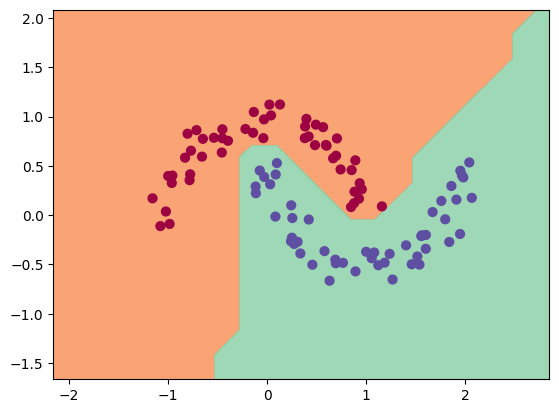

In [7]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0.5 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())